<a name="machine-learning-examples"></a>

## 機械学習の例

Colaboratory で実現したインタラクティブな機械学習解析のさまざまな応用例は、<a href="https://tfhub.dev">TensorFlow Hub</a> のモデルを活用したチュートリアルでご紹介しています。

おすすめの例をご紹介します。

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">画像分類の再トレーニング</a>: 事前トレーニング済みの画像分類を再利用して Keras モデルを構築し、花を分類します。
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">テキスト分類</a>: IMDB の映画レビューをポジティブ<em></em>なレビューとネガティブ<em></em>なレビューに分類します。
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">スタイル転送</a>: ディープ ラーニングを使用して画像間でスタイルを転送します。
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder の Q&A</a>: 機械学習モデルを使用して、SQuAD データベースからの質問に回答します。
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">動画の補間</a>: 動画の最初のフレームと最後のフレームの間に何か起こったのかを予測します。


In [5]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1


# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123

In [6]:
# ダウンロード元URL
url = 'https://archive.ics.uci.edu/ml/\
machine-learning-databases/00275/\
Bike-Sharing-Dataset.zip'

# 公開データのダウンロードと解凍
!wget $url -O Bike-Sharing-Dataset.zip | tail -n 1
!unzip -o Bike-Sharing-Dataset.zip | tail -n 1

--2020-11-22 00:10:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K  1008KB/s    in 0.3s    

2020-11-22 00:10:56 (1008 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]

  inflating: hour.csv                


In [7]:

# データの状態確認
!head -5 day.csv

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562


In [8]:

# day.csvをデータフレームに取り込み
# 日付を表す列はparse_datesで指定する
df = pd.read_csv('day.csv', parse_dates=[1])

# データ属性の確認
print(df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [9]:
# instant は連番で予測で不要なので削除
df = df.drop('instant', axis=1)

# 項目名の日本語化

columns = [
    '日付',  '季節',  '年', '月', '祝日', '曜日', '勤務日', '天気', 
    '気温', '体感温度',  '湿度', '風速',
    '臨時ユーザー利用数', '登録ユーザー利用数', '全体ユーザー利用数'
]

# 項目名を日本語に置き換え
df.columns = columns

In [10]:
# 先頭5行の確認
display(df.head())

# 最終5行の確認
display(df.tail())

,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
0,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600


,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
726,2012-12-27,1,1,12,0,4,1,2,0.2542,0.2266,0.6529,0.3501,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.2533,0.2550,0.5900,0.1555,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.2533,0.2424,0.7529,0.1244,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.2558,0.2317,0.4833,0.3508,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.2158,0.2235,0.5775,0.1548,439,2290,2729


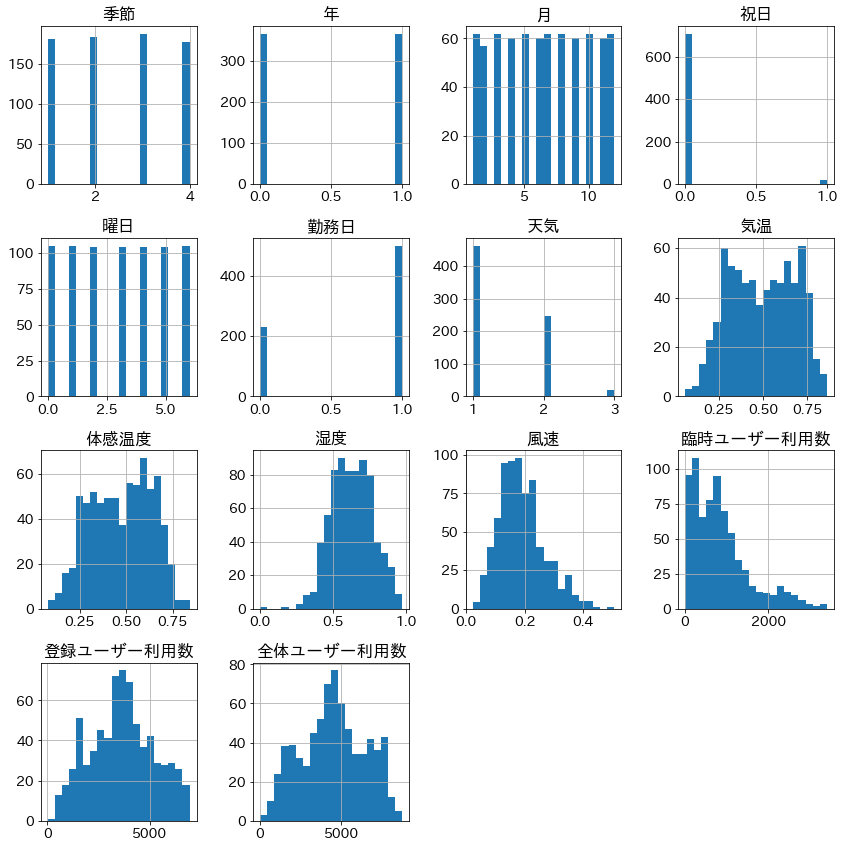

In [11]:
# 度数分布表示

# グラフのサイズ調整のためのおまじない
from pylab import rcParams
rcParams['figure.figsize'] = (12, 12)

# データフレームの数値項目でヒストグラム表示
df.hist(bins=20)
plt.tight_layout()
plt.show()

In [12]:
# x, yへの分割
x = df.drop(['日付', '臨時ユーザー利用数', '登録ユーザー利用数',
    '全体ユーザー利用数'], axis=1)
y = df['登録ユーザー利用数'].values

In [13]:
# 分割日 mdayの設定
mday = pd.to_datetime('2012-11-1')

# 訓練用indexと検証用indexを作る
train_index = df['日付'] < mday
test_index = df['日付'] >= mday

# 入力データの分割
x_train = x[train_index]
x_test = x[test_index]

# yも同様に分割
y_train = y[train_index]
y_test = y[test_index]

# 日付データの分割(グラフ表示用)
dates_test = df['日付'][test_index]

In [14]:
# 結果確認(サイズを確認)
print(x_train.shape)
print(x_test.shape)

# 結果確認 (境界値を重点的に)
display(x_train.tail())
display(x_test.head())

(670, 11)
(61, 11)


,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
665,4,1,10,0,6,0,2,0.5300,0.5151,0.7200,0.2357
666,4,1,10,0,0,0,2,0.4775,0.4678,0.6946,0.3980
667,4,1,10,0,1,1,3,0.4400,0.4394,0.8800,0.3582
668,4,1,10,0,2,1,2,0.3182,0.3099,0.8255,0.2130
669,4,1,10,0,3,1,2,0.3575,0.3611,0.6667,0.1667


,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
670,4,1,11,0,4,1,2,0.3658,0.3699,0.5817,0.1573
671,4,1,11,0,5,1,1,0.3550,0.3560,0.5221,0.2662
672,4,1,11,0,6,0,2,0.3433,0.3238,0.4913,0.2705
673,4,1,11,0,0,0,1,0.3258,0.3295,0.5329,0.1791
674,4,1,11,0,1,1,1,0.3192,0.3081,0.4942,0.2363


In [15]:

# 目的変数の分割結果確認
print(y_train[:10])

[ 654  670 1229 1454 1518 1518 1362  891  768 1280]


In [16]:
# アルゴリズム選定
# XGBRegressorを選定する
from xgboost import XGBRegressor
algorithm = XGBRegressor(objective ='reg:squarederror',
    random_state=random_seed)

In [17]:
# 登録ユーザー利用数予測モデルの学習と予測

# 学習
algorithm.fit(x_train, y_train)

# 予測
y_pred = algorithm.predict(x_test)

# 予測結果確認
print(y_pred[:5])

[4613.577  4863.4756 4057.923  3642.1284 4354.408 ]


In [18]:

# 評価(登録ユーザー利用数)

# score関数の呼び出し
score = algorithm.score(x_test, y_test)

# R2値の計算
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)

# 結果確認
print(f'score: {score:.4f}  r2_ score: {r2_score:.4f}')

score: 0.5294  r2_ score: 0.5294


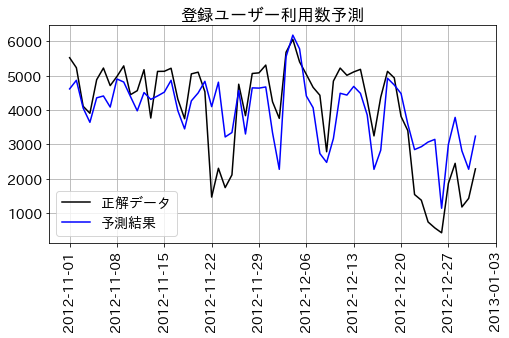

In [19]:
# 時系列グラフの描画 (登録ユーザー利用数)
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# グラフ描画
ax.plot(dates_test, y_test, label='正解データ', c='k')
ax.plot(dates_test, y_pred, label='予測結果', c='b')

# 日付目盛間隔
# 木曜日ごとに日付を表示
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 日付表記を90度回転
ax.tick_params(axis='x', rotation=90)

# 方眼表示など
ax.grid()
ax.legend()
ax.set_title('登録ユーザー利用数予測')

# 画面出力
plt.show()

In [20]:
# 項目をone hot encodeするための関数
def enc(df, column):
    df_dummy = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df.drop([column],axis=1),df_dummy],axis=1)
    return df

# 項目「月」「季節」をone hot encodingする

x2 = x.copy()
x2 = enc(x2, '月')
x2 = enc(x2, '季節')

# 結果確認
display(x2.head())

,年,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,月_1,月_2,月_3,月_4,月_5,月_6,月_7,月_8,月_9,月_10,月_11,月_12,季節_1,季節_2,季節_3,季節_4
0,0,0,6,0,2,0.3442,0.3636,0.8058,0.1604,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,2,0.3635,0.3537,0.6961,0.2485,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,1,0.1964,0.1894,0.4373,0.2483,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,2,1,1,0.2000,0.2121,0.5904,0.1603,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,3,1,1,0.2270,0.2293,0.4370,0.1869,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
# 登録利用者モデル(チューニング後)

# mdayを基準に入力データを分割
x2_train = x2[train_index]
x2_test = x2[test_index]

#　アルゴリズム選定
algorithm2 = XGBRegressor(objective ='reg:squarederror',
    random_state=random_seed)

# 学習
algorithm2.fit(x2_train, y_train)

# 予測
y_pred2 = algorithm2.predict(x2_test)

# 予測結果確認
print(y_pred2[:5])

[4509.6143 4841.9644 3852.8997 3567.8196 4280.041 ]


In [22]:
# 評価(登録利用者) (チューニング後)

# score関数の呼び出し
score2 = algorithm2.score(x2_test, y_test)

# 結果確認
print(f'score: {score2:.4f}')

score: 0.6182


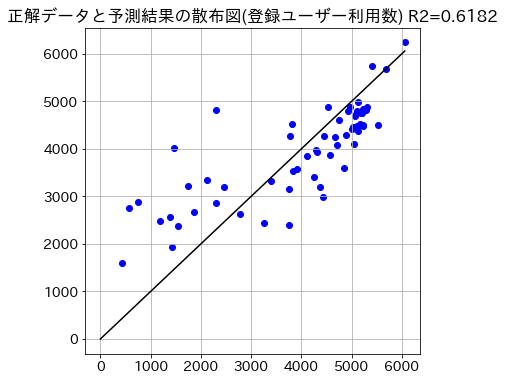

In [23]:
#正解データと予測結果を散布図で比較 (登録利用者)
plt.figure(figsize=(6,6))
y_max = y_test.max()
plt.plot((0,y_max), (0, y_max), c='k')
plt.scatter(y_test, y_pred2, c='b')
plt.title(f'正解データと予測結果の散布図(登録ユーザー利用数) R2={score2:.4f}')
plt.grid()
plt.show()

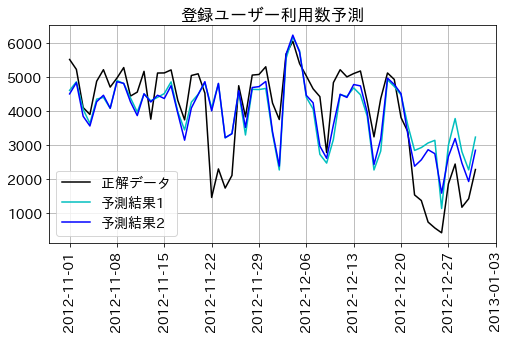

In [24]:
# 時系列グラフの描画 (チューニング後 登録ユーザー利用数)
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# グラフ描画
ax.plot(dates_test, y_test, label='正解データ', c='k')
ax.plot(dates_test, y_pred, label='予測結果1', c='c')
ax.plot(dates_test, y_pred2, label='予測結果2', c='b')

# 日付目盛間隔
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 日付書式
ax.tick_params(axis='x', rotation=90)

# 方眼表示など
ax.grid()
ax.legend()
ax.set_title('登録ユーザー利用数予測')

# 画面出力
plt.show()

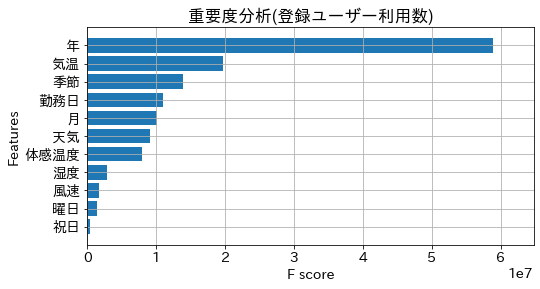

In [25]:

# 登録ユーザー利用数に対する重要度分析
import xgboost as xgb
fig, ax = plt.subplots(figsize=(8, 4))
xgb.plot_importance(algorithm, ax=ax, height=0.8,
    importance_type='gain', show_values=False,
    title='重要度分析(登録ユーザー利用数)')
plt.show()

## <strong>はじめに</strong>

ご覧になっているこのドキュメントは静的なウェブページではなく、<strong>Colab ノートブック</strong>という、コードを記述して実行できるインタラクティブな環境です。

たとえば次の<strong>コードセル</strong>には、値を計算して変数に保存し、結果を出力する短い Python スクリプトが記述されています。

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

上記のセルのコードを実行するには、セルをクリックして選択し、コードの左側にある実行ボタンをクリックするか、キーボード ショートカット「command+return」または「Ctrl+Enter」を使用します。コードはセルをクリックしてそのまま編集できます。

1 つのセルで定義した変数は、後で他のセルで使用できます。

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab ノートブックを使用すると、<strong>実行可能コード</strong>と<strong>リッチテキスト</strong>（<strong>画像</strong>、<strong>HTML</strong>、<strong>LaTeX</strong> なども可）を 1 つのドキュメントで記述できます。ご自分の Colab ノートブックを作成すると、Google ドライブ アカウントに保存されます。Colab ノートブックは、同僚や友人と簡単に共有し、コメントの記入や編集をしてもらうことができます。詳細については <a href="/notebooks/basic_features_overview.ipynb">Colab の概要</a>をご覧ください。新しい Colab ノートブックを作成するには、上にある &#91;ファイル&#93; メニューを使用するか、<a href="http://colab.research.google.com#create=true">こちら</a>をクリックします。

Colab ノートブックは、Colab がホストする Jupyter ノートブックです。Jupyter プロジェクトの詳細については、<a href="https://www.jupyter.org">jupyter.org</a> をご覧ください。

## データ サイエンス

Colab では、よく使用されている Python ライブラリの機能をフルに活用して、データの分析と可視化を行えます。以下のコードセルでは、<strong>numpy</strong> を使用してランダムデータを生成し、<strong>matplotlib</strong> を使用して可視化しています。コードはセルをクリックしてそのまま編集できます。

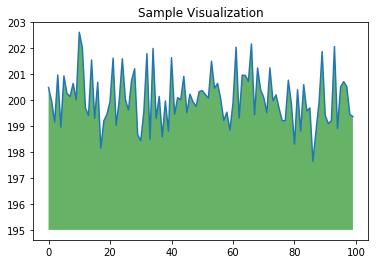

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

Colab ノートブックには、Google ドライブ アカウント（スプレッドシートを含む）からご自分のデータをインポートできます。また、GitHub やその他多くのソースからのインポートも可能です。データのインポートについて、またデータ サイエンスで Colab を使用する方法の詳細については、<a href="#working-with-data">データの操作</a>の下にあるリンクをクリックしてください。

## 機械学習

Colab を使用すると、画像データセットのインポート、画像分類のトレーニング、モデルの評価をすべて<a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">数行のコード</a>で実行できます。Colab ノートブックは Google のクラウド サーバーでコードを実行します。そのため、パソコンの性能にかかわらず、<a href="#using-accelerated-hardware">GPU や TPU</a> など Google ハードウェアの優れた機能を活用できます。必要なのはブラウザだけです。

Colab は、次に示す用途を含め、機械学習コミュニティで広く使用されています。
- TensorFlow の導入
- ニューラル ネットワークの開発とトレーニング
- TPU を利用した実験
- AI リサーチの促進
- チュートリアルの作成

Colab ノートブックを機械学習に応用したサンプルについては、以下の<a href="#machine-learning-examples">機械学習の例</a>をご覧ください。

## その他のリソース

### Colab でのノートブックの操作
- [Colaboratory の概要](/notebooks/basic_features_overview.ipynb)
- [markdown のガイド](/notebooks/markdown_guide.ipynb)
- [ライブラリのインポートと依存関係のインストール](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub でのノートブックの保存と読み込み](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [インタラクティブなフォーム](/notebooks/forms.ipynb)
- [インタラクティブなウィジェット](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [Colab の TensorFlow 2](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### データの操作
- [データの読み込み: ドライブ、スプレッドシート、Google Cloud Storage](/notebooks/io.ipynb) 
- [グラフ: データの視覚化](/notebooks/charts.ipynb)
- [BigQuery を使ってみる](/notebooks/bigquery.ipynb)

### 機械学習の集中講座
Google の機械学習に関するオンライン コースからいくつかのノートブックをご紹介します。詳しくは、<a href="https://developers.google.com/machine-learning/crash-course/">全コースのウェブサイト</a>をご覧ください。
- [pandas の概要](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow のコンセプト](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [TensorFlow での最初の手順](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [ニューラル ネットの概要](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [スパースデータと埋め込みの概要](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### アクセラレータの使用
- [TensorFlow と GPU](/notebooks/gpu.ipynb)
- [TensorFlow と TPU](/notebooks/tpu.ipynb)

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Colaboratory とは</h1>

Colaboratory（略称: Colab）は、ブラウザから Python を記述、実行できるサービスです。次の特長を備えています。
- 環境構築が不要
- GPU への無料アクセス
- 簡単に共有

Colab は、<strong>学生</strong>から<strong>データ サイエンティスト</strong>、<strong>AI リサーチャー</strong>まで、皆さんの作業を効率化します。詳しくは、<a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab の紹介動画</a>をご覧ください。下のリンクからすぐに使ってみることもできます。